CC as Predictor!

In [1]:
import networkx as nx
import pandas as pd
import os
from pathlib import Path

DATASET_DIRECTORY = Path("/home/timgarrels/masterthesis/datasets")


OUT = DATASET_DIRECTORY / "random_graphs"
g_ps = [g_p for g_p in os.listdir(OUT) if "m_3" in g_p]


data = []
for g_p in g_ps:
    g = nx.read_edgelist(OUT / g_p)
    data.append({
        "name": g_p,
        "graph": g_p[2:],
        "nodes": g.number_of_nodes(),
        "edges": g.number_of_edges(),
        "avg cc": nx.average_clustering(g)
    })
df = pd.DataFrame(data)
df

,name,graph,nodes,edges,avg cc
0,0_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.030093
1,4_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.026055
2,1_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.034725
3,3_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.045369
4,2_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.032764


In [2]:
df.sort_values(by="avg cc")

,name,graph,nodes,edges,avg cc
1,4_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.026055
0,0_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.030093
4,2_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.032764
2,1_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.034725
3,3_barabasi_albert_graph_m_3,barabasi_albert_graph_m_3,1000,2991,0.045369


In [3]:
print(df.groupby(by="graph").agg({
    "name": lambda x: None,
    "nodes": set,
    "edges": lambda x: (min(x), max(x)),
    "avg cc": lambda x: (round(min(x), 2), round(max(x),2)),
}).to_latex())

\begin{tabular}{lllll}
\toprule
 & name & nodes & edges & avg cc \\
graph &  &  &  &  \\
\midrule
barabasi_albert_graph_m_3 & NaN & {1000} & (2991, 2991) & (0.03, 0.05) \\
\bottomrule
\end{tabular}



In [4]:
df.sort_values(by="graph").to_latex()

'\\begin{tabular}{lllrrr}\n\\toprule\n & name & graph & nodes & edges & avg cc \\\\\n\\midrule\n0 & 0_barabasi_albert_graph_m_3 & barabasi_albert_graph_m_3 & 1000 & 2991 & 0.030093 \\\\\n1 & 4_barabasi_albert_graph_m_3 & barabasi_albert_graph_m_3 & 1000 & 2991 & 0.026055 \\\\\n2 & 1_barabasi_albert_graph_m_3 & barabasi_albert_graph_m_3 & 1000 & 2991 & 0.034725 \\\\\n3 & 3_barabasi_albert_graph_m_3 & barabasi_albert_graph_m_3 & 1000 & 2991 & 0.045369 \\\\\n4 & 2_barabasi_albert_graph_m_3 & barabasi_albert_graph_m_3 & 1000 & 2991 & 0.032764 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [5]:
from tqdm import tqdm


def get_exclusive_neigborhood(g, vertex, nodes):
    vertex_neighbors = g.neighbors(vertex)
    subgraph_neighbors = set()
    for n in nodes:
        subgraph_neighbors.update(g.neighbors(n))
    return list(set(vertex_neighbors) - subgraph_neighbors)
        

def enumerate_subgraphs(g: nx.Graph, k: int):
    subgraphs = []
    def extend_subgraph(v_subgraph, v_extension, v):
        if len(v_subgraph) == k:
            subgraphs.append(v_subgraph)
            return

        while len(v_extension) != 0:
            w = v_extension.pop()
            
            exlusive_w_neighborhood = get_exclusive_neigborhood(g, w, v_subgraph)
            extension_set_additions = [n for n in exlusive_w_neighborhood if n > v]
            extend_subgraph(
                v_subgraph + [w],
                list(set(v_extension + extension_set_additions)),
                v,
            )
            

    for v in tqdm(g.nodes, desc=f"Walking over nodes {k}", leave=False):
        v_extension = [n for n in g.neighbors(v) if n > v]
        extend_subgraph([v], v_extension, v)
    return subgraphs
        

In [6]:
data = []
for g_p in tqdm(g_ps, desc="Walking over graphs", leave=False):
    g = nx.read_edgelist(OUT / g_p)
    
    subgraphs_3 = enumerate_subgraphs(g, 3)    
    subgraphs_4 = enumerate_subgraphs(g, 4)
    
    
    
    data.append({
        "name": g_p,
        "nodes": g.number_of_nodes(),
        "edges": g.number_of_edges(),
        "# 3 subgraphs": len(subgraphs_3),
        "# 4 subgraphs": len(subgraphs_4),
    })
pd.DataFrame(data).sort_values(by="name")

Walking over nodes 3:  37%|██████████████████████████████████████████████▉                                                                               | 373/1000 [00:00<00:00, 1262.17it/s]
                                                                                                                                                                                              
Walking over nodes 3:  19%|███████████████████████▊                                                                                                      | 189/1000 [00:00<00:00, 1886.52it/s]


                                                                                                                                                                                              
Walking over nodes 3:  59%|██████████████████████████████████████████████████████████████████████████▎                                                   | 590/1000 [00:00<00:00, 3204.96it/s]
                                                                                                                                                                                              
Walking over nodes 4:   9%|███████████▌                                                                                                                    | 90/1000 [00:02<00:08, 108.33it/s]


Walking over nodes 3:  26%|████████████████████████████████▌                                                                                             | 258/1000 [00:00<00:00, 1446.90it/s]
                                                                                                                                                                                              
Walking over nodes 4:  24%|███████████████████████████████                                                                                                 | 243/1000 [00:07<00:11, 67.96it/s]


Walking over nodes 3:  47%|███████████████████████████████████████████████████████████                                                                   | 469/1000 [00:00<00:00, 2730.87it/s]
                                                                                                                                                                                              
Walking over nodes 4:  69%|████████████████████████████████████████████████████████████████████████████████████████▏                                      | 694/1000 [00:07<00:00, 508.56it/s]


Walking over nodes 4:  93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 928/1000 [00:08<00:00, 977.19it/s]


,name,nodes,edges,# 3 subgraphs,# 4 subgraphs
0,0_barabasi_albert_graph_m_3,1000,2991,37123,790576
2,1_barabasi_albert_graph_m_3,1000,2991,41192,1020889
4,2_barabasi_albert_graph_m_3,1000,2991,42627,1221209
3,3_barabasi_albert_graph_m_3,1000,2991,47202,1449247
1,4_barabasi_albert_graph_m_3,1000,2991,35221,686268


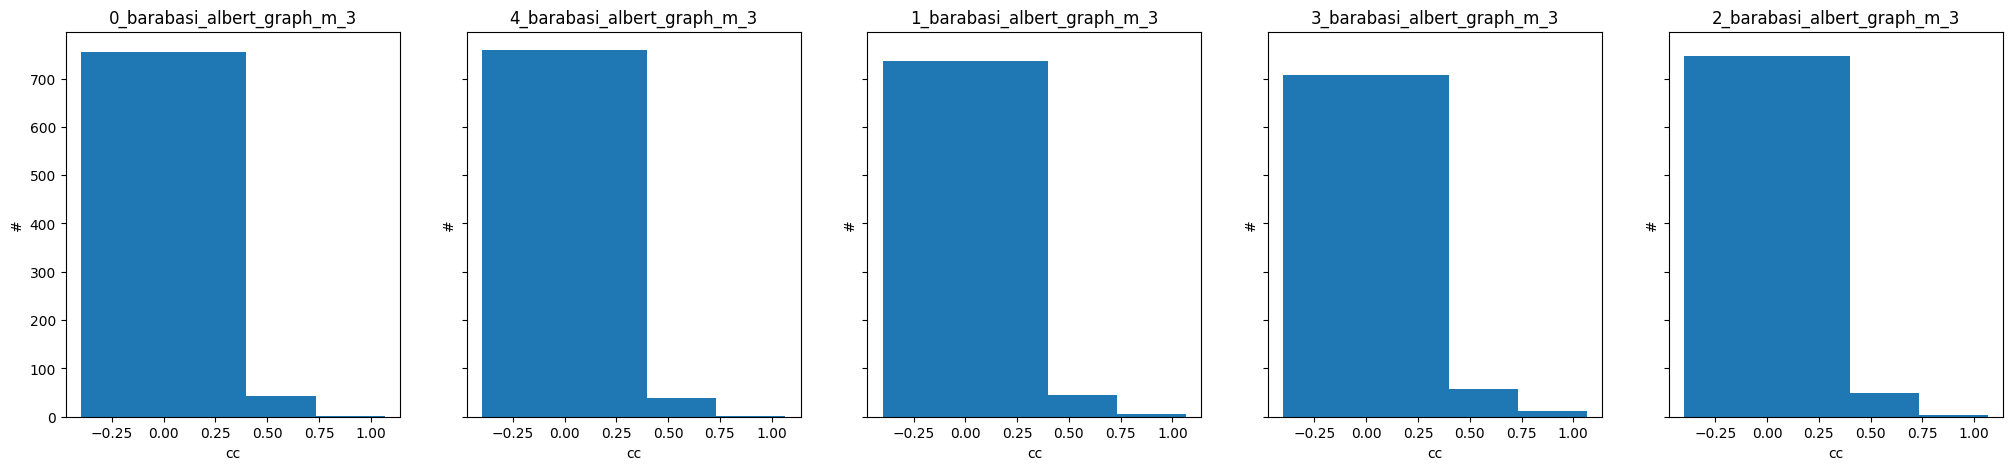

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict


fig, axes = plt.subplots(1, len(g_ps), figsize=(5 * len(g_ps), 5), sharey=True)


for i, g_p in enumerate(g_ps):
    ax = axes[i]
    
    g = nx.read_edgelist(OUT / g_p)
    
    cc = defaultdict(lambda: 0)
    for _, n_cc in nx.clustering(g).items():
        cc[n_cc] += 1

    ax.bar(cc.keys(), cc.values())
    ax.set_title(g_p)
    
    ax.set_xlabel("cc")
    ax.set_ylabel("#")
   

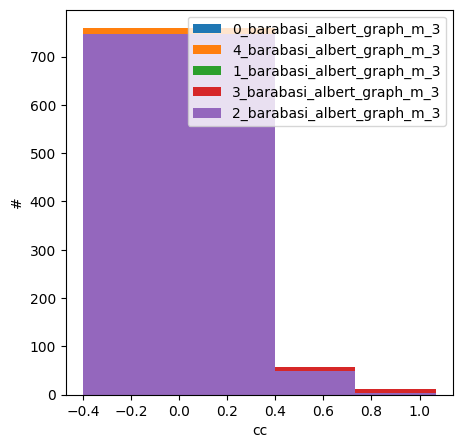

In [8]:
import matplotlib.pyplot as plt
from collections import defaultdict


fig, ax = plt.subplots(1, 1, figsize=(5,5))


for i, g_p in enumerate(g_ps):    
    g = nx.read_edgelist(OUT / g_p)
    
    cc = defaultdict(lambda: 0)
    for _, n_cc in nx.clustering(g).items():
        cc[n_cc] += 1

    ax.bar(cc.keys(), cc.values(), label=g_p)

ax.set_xlabel("cc")
ax.set_ylabel("#")
ax.legend()
   

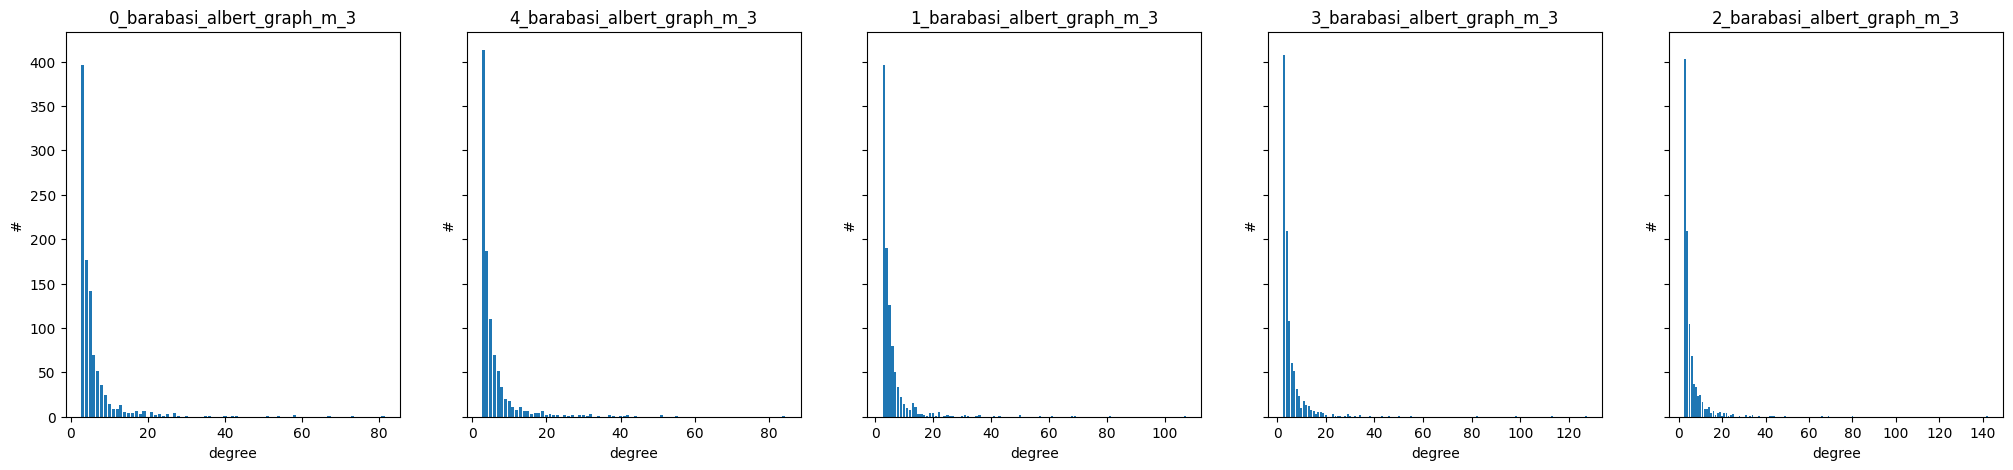

In [9]:
# Degree of a node and his neighbors
import matplotlib.pyplot as plt
from collections import defaultdict


fig, axes = plt.subplots(1, len(g_ps), figsize=(5 * len(g_ps), 5), sharey=True)


for i, g_p in enumerate(g_ps):
    ax = axes[i]
    
    g = nx.read_edgelist(OUT / g_p)
    
    degrees = defaultdict(lambda: 0)
    for n in g.nodes:
        n_neighbors = g.neighbors(n)
        
        all_neighbors = set(n_neighbors)
        for neighbor in n_neighbors:
            all_neighbors.update(g.neighbors(neighbor))
        degrees[len(all_neighbors)] += 1

    ax.bar(degrees.keys(), degrees.values())
    ax.set_title(g_p)
    
    ax.set_xlabel("degree")
    ax.set_ylabel("#")
   

In [10]:
pd.DataFrame(data).sort_values(by="name")

,name,nodes,edges,# 3 subgraphs,# 4 subgraphs
0,0_barabasi_albert_graph_m_3,1000,2991,37123,790576
2,1_barabasi_albert_graph_m_3,1000,2991,41192,1020889
4,2_barabasi_albert_graph_m_3,1000,2991,42627,1221209
3,3_barabasi_albert_graph_m_3,1000,2991,47202,1449247
1,4_barabasi_albert_graph_m_3,1000,2991,35221,686268


0_barabasi_albert_graph_m_3
5.982


4_barabasi_albert_graph_m_3
5.982


1_barabasi_albert_graph_m_3
5.982


3_barabasi_albert_graph_m_3
5.982


2_barabasi_albert_graph_m_3
5.982




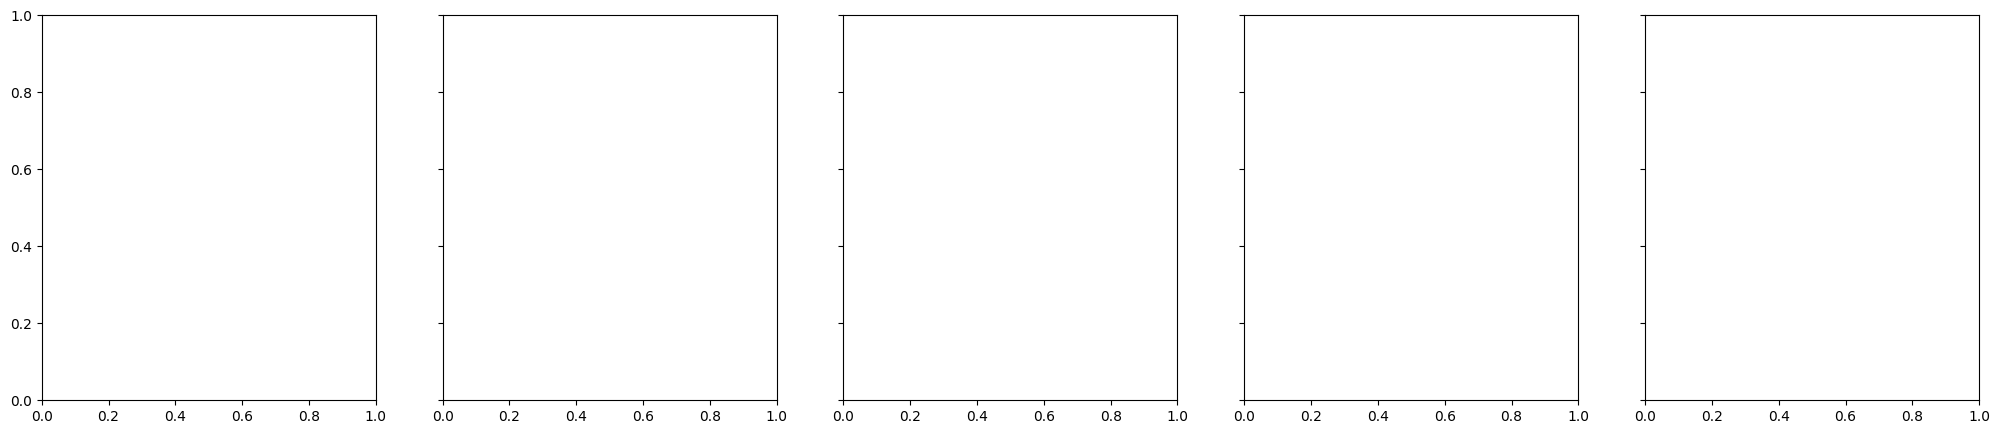

In [11]:
import matplotlib.pyplot as plt
from collections import defaultdict


fig, axes = plt.subplots(1, len(g_ps), figsize=(5 * len(g_ps), 5), sharey=True)


for i, g_p in enumerate(g_ps):
    ax = axes[i]
    
    g = nx.read_edgelist(OUT / g_p)
    
    avg_degree = dict(g.degree).values()
    avg_degree = sum(avg_degree) / len(avg_degree)
    print(g_p)
    print(avg_degree)
    print()
    print()

In [12]:
g_1 = nx.read_edgelist(OUT/"0_scale_free_graph_a_28_b_7_g_02")

g_2 = nx.read_edgelist(OUT/"0_scale_free_graph_a_35_b_3_g_35")


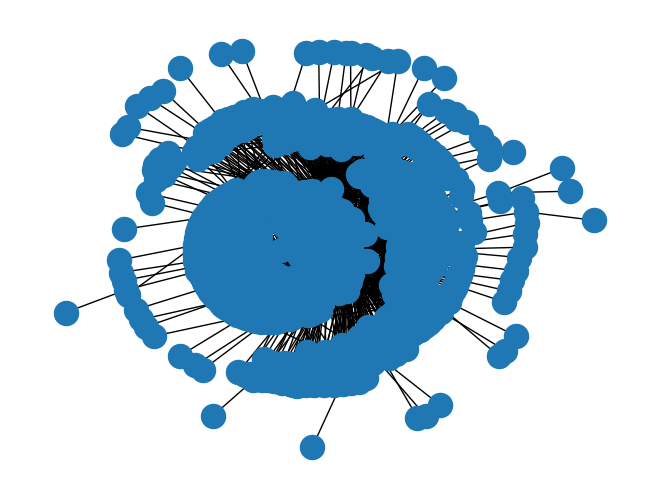

In [13]:
pos = nx.kamada_kawai_layout(g_1)
nx.draw(g_1, pos=pos)

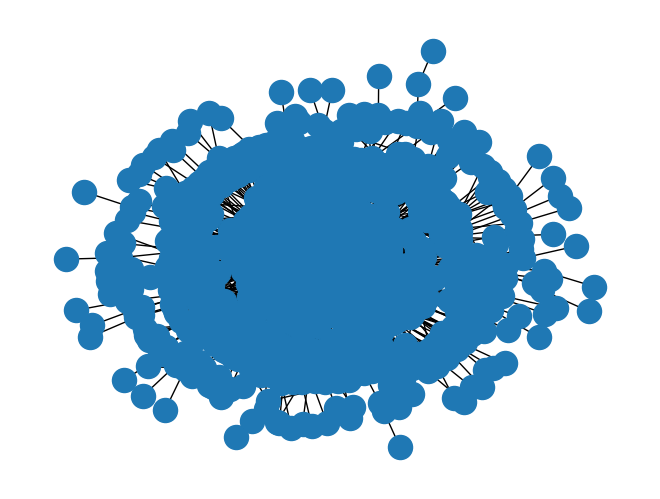

In [14]:
pos_2 = nx.kamada_kawai_layout(g_2)
nx.draw(g_2, pos=pos_2)

# PREDICTION OVER CLIQUE COUNT?

In [15]:
data

[{'name': '0_barabasi_albert_graph_m_3',
  'nodes': 1000,
  'edges': 2991,
  '# 3 subgraphs': 37123,
  '# 4 subgraphs': 790576},
 {'name': '4_barabasi_albert_graph_m_3',
  'nodes': 1000,
  'edges': 2991,
  '# 3 subgraphs': 35221,
  '# 4 subgraphs': 686268},
 {'name': '1_barabasi_albert_graph_m_3',
  'nodes': 1000,
  'edges': 2991,
  '# 3 subgraphs': 41192,
  '# 4 subgraphs': 1020889},
 {'name': '3_barabasi_albert_graph_m_3',
  'nodes': 1000,
  'edges': 2991,
  '# 3 subgraphs': 47202,
  '# 4 subgraphs': 1449247},
 {'name': '2_barabasi_albert_graph_m_3',
  'nodes': 1000,
  'edges': 2991,
  '# 3 subgraphs': 42627,
  '# 4 subgraphs': 1221209}]

In [16]:
df = pd.DataFrame(data).sort_values(by="name")

In [17]:
c3s = []
c4s = []
for g_p in df["name"]:
    g = nx.read_edgelist(OUT / g_p)
    cliques = list(nx.enumerate_all_cliques(g))
    c3 = len([c for c in cliques if len(c) == 3])
    c4 = len([c for c in cliques if len(c) == 4])
    
    c3s.append(c3)
    c4s.append(c4)
    
df["# 3-Clique"] = c3s
df["# 4-Clique"] = c4s

df

,name,nodes,edges,# 3 subgraphs,# 4 subgraphs,# 3-Clique,# 4-Clique
0,0_barabasi_albert_graph_m_3,1000,2991,37123,790576,219,8
2,1_barabasi_albert_graph_m_3,1000,2991,41192,1020889,276,11
4,2_barabasi_albert_graph_m_3,1000,2991,42627,1221209,251,9
3,3_barabasi_albert_graph_m_3,1000,2991,47202,1449247,332,15
1,4_barabasi_albert_graph_m_3,1000,2991,35221,686268,197,2


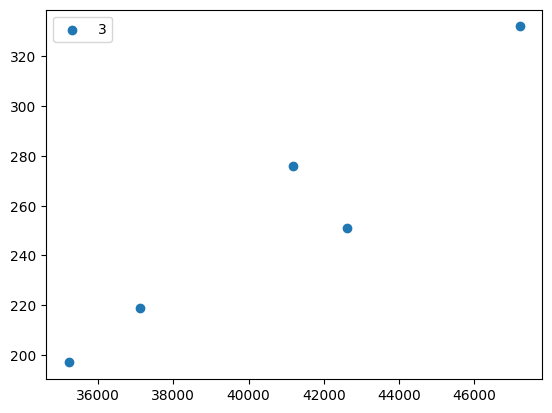

In [18]:
plt.scatter(
    df["# 3 subgraphs"],
    df["# 3-Clique"],
    label="3"
)

plt.legend()

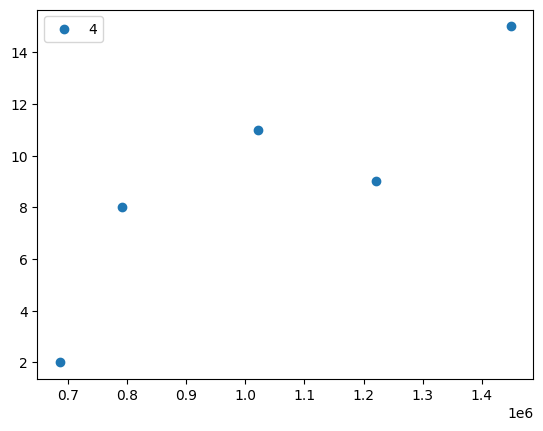

In [19]:
plt.scatter(
    df["# 4 subgraphs"],
    df["# 4-Clique"],
    label="4"
)
plt.legend()

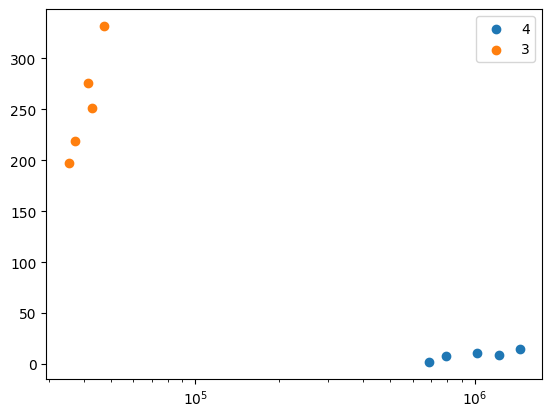

In [20]:
plt.scatter(
    df["# 4 subgraphs"],
    df["# 4-Clique"],
    label="4"
)

plt.scatter(
    df["# 3 subgraphs"],
    df["# 3-Clique"],
    label="3"
)

plt.legend()

plt.xscale("log")